# Challenge: Data Salaries Analysis

## job applicant Information:
<p>Name: Marco Tulio Ruiz</p>
<p>Email: <a>martulioruiz@gmail.com</a></p>
<p>Phone: (+504) 93546130

## Description:
For this challenge, the company provides a comma-separated value (CSV) file. Firsthand the .csv file contains salary data. The data is presented in an unstructured way (due to messy data). Therefore, it has to pass throught a structure transform process and data clean process before analysis

# 1. Importing Libraries

In [98]:
import pandas as pd
import re
from numpy import genfromtxt
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import nltk
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/meraki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2.Retrieving

In [2]:
with open("Data_Analyst_test.csv",'rb') as f:
    contents = f.read()
    contents = contents.decode("utf-8", "ignore")

# 3. Preprocessing

In [3]:
contents = re.sub(";+","",contents)
contents = re.sub(r'\"\"', "''''", contents)
contents = re.sub(r'\"', "", contents)
contents = re.sub("''''", r'""', contents)
contents = re.sub(r'\"\"', '"', contents)
contents = re.sub(r'\,', ',', contents)


with open('data.csv', 'w') as f:
    f.write(contents)

In [4]:
csvStringIO = StringIO(contents)

In [5]:
data = pd.read_csv(csvStringIO, sep=",", on_bad_lines='skip')

# 4. Knowing our dataset

In [6]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Revenue
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,$50 to $100 million (USD)
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care,$2 to $5 billion (USD)
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Business Services,$100 to $500 million (USD)
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD)
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Business Services,Unknown / Non-Applicable


In [7]:
data.shape

(642, 12)

In [8]:
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Revenue'],
      dtype='object')

In [9]:
data.nunique()

Job Title            208
Salary Estimate      370
Job Description      407
Rating                32
Company Name         321
Location             189
Headquarters         186
Size                   9
Founded               98
Type of ownership     10
Industry              25
Revenue               13
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          642 non-null    object
 1   Salary Estimate    642 non-null    object
 2   Job Description    642 non-null    object
 3   Rating             642 non-null    object
 4   Company Name       642 non-null    object
 5   Location           642 non-null    object
 6   Headquarters       642 non-null    object
 7   Size               642 non-null    object
 8   Founded            642 non-null    object
 9   Type of ownership  642 non-null    object
 10  Industry           639 non-null    object
 11  Revenue            639 non-null    object
dtypes: object(12)
memory usage: 60.3+ KB


# 5. Cleaning and Transforming

In [11]:
data = data.dropna()

In [12]:
data.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Revenue              0
dtype: int64

In [13]:
def clean_salary_estimate(value):
    value = re.sub('[^0-9-K]','',value)
    value = re.sub('[K]','000', value)
    return value

In [14]:
def clean_job_description(value):
    value = re.sub('\\n',' ', value)
    return value

In [15]:
def clean_company_name(value):
    value = re.sub('\\n[\s\S]*','',value)
    return value

In [16]:
def clean_size(value):
    value = re.sub('[^0-9-+]','',value)
    return value

In [17]:
def clean_revenue(value):
    if value == '$50 to $100 million (USD)': return '50000000-100000000'
    if value == '$2 to $5 billion (USD)': return '2000000000-5000000000'
    if value == '$100 to $500 million (USD)': return '100000000-500000000'
    if value == '$500 million to $1 billion (USD)': return '500000000-1000000000'
    if value == 'Unknown / Non-Applicable': return '0'
    if value == '$1 to $2 billion (USD)': return '2000000000-5000000000'
    if value == '$25 to $50 million (USD)': return '1000000000-2000000000'
    if value == '$10+ billion (USD)': return '10000000000'
    if value == '$10 to $25 million (USD)': return '10000000-25000000'
    if value == '$5 to $10 billion (USD)': return '5000000000-10000000000'
    if value == 'Less than $1 million (USD)': return '0-1000000'
    if value == '$1 to $5 million (USD)': return '1000000-5000000'
    if value == '$5 to $10 million (USD)': return '5000000-10000000'
    return '0'

In [18]:
data['Salary Estimate']=data['Salary Estimate'].apply(clean_salary_estimate)

In [19]:
data['Job Description']=data['Job Description'].apply(clean_job_description).str.lower()

In [20]:
data['Rating'] = data['Rating'].astype(float)

In [21]:
data['Company Name']=data['Company Name'].apply(clean_company_name)

In [22]:
data['Size']=data['Size'].apply(clean_size)

In [23]:
data['Founded'] = data['Founded'].astype(int)

In [24]:
data['Revenue']=data['Revenue'].apply(clean_revenue)

In [25]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Revenue
0,Data Scientist,53000-91000,"data scientist location: albuquerque, nm educa...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501-1000,1973,Company - Private,Aerospace & Defense,50000000-100000000
1,Healthcare Data Scientist,63000-112000,what you will do: i. general summary the hea...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care,2000000000-5000000000
2,Data Scientist,80000-90000,"knowbe4, inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501-1000,2010,Company - Private,Business Services,100000000-500000000
3,Data Scientist,56000-97000,*organization and job id** job id: 310709 dir...,3.8,PNNL,"Richland, WA","Richland, WA",1001-5000,1965,Government,"Oil, Gas, Energy & Utilities",500000000-1000000000
4,Data Scientist,86000-143000,data scientist affinity solutions / marketing ...,2.9,Affinity Solutions,"New York, NY","New York, NY",51-200,1998,Company - Private,Business Services,0


# 4. Exploratory Data Analysis

### I. What can you say about the Salaries for data related Job? How do they differ from one another based on the kind of data professional?
At this point, for each record we have a numeric salary range. Therefore, the estimated minimum wage and the estimated maximum wage were taken to obtain the mean per record. Then was created a subset of Salary Mean per Job Title. This subset was grouped by Job Title with the agregattion of salary mean. Finally was compared the data to get an insight.

In [26]:
def salary_mean(value):
    value = re.split('-', value)
    mean = (int(value[0]) + int(value[1]))/2
    return mean

In [27]:
data['Salary Mean'] = data['Salary Estimate'].apply(salary_mean).astype(float)

<AxesSubplot:xlabel='Job Title'>

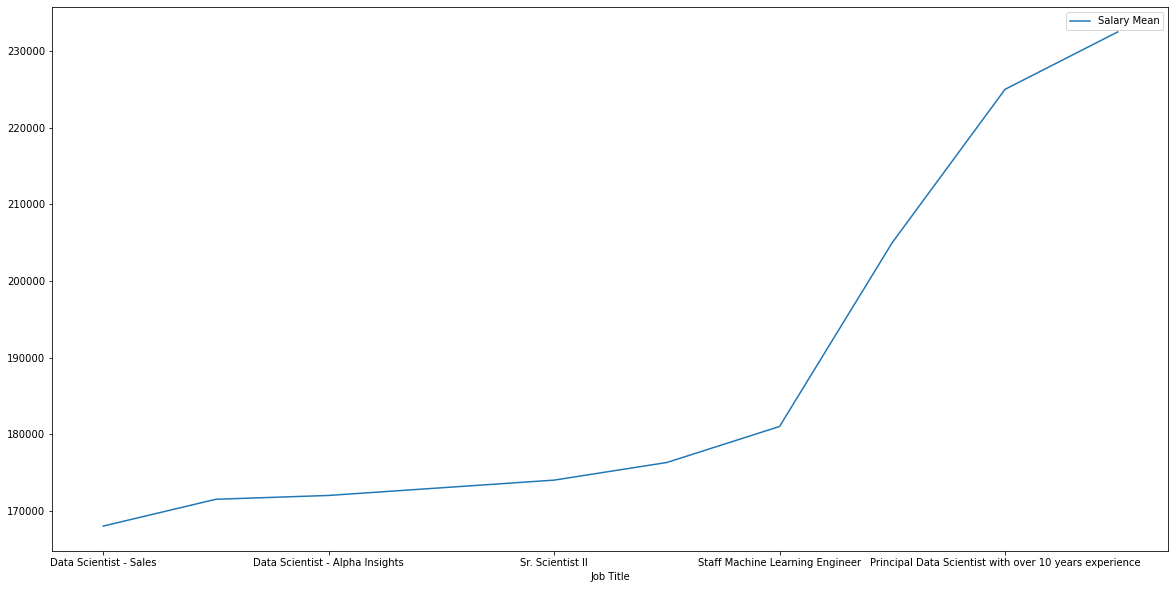

In [28]:
data1 = data[['Job Title','Salary Mean']].groupby(['Job Title']).mean().sort_values(ascending=True,by='Salary Mean').tail(10)
data1.plot(kind='line',figsize=(20,10))

<AxesSubplot:xlabel='Job Title'>

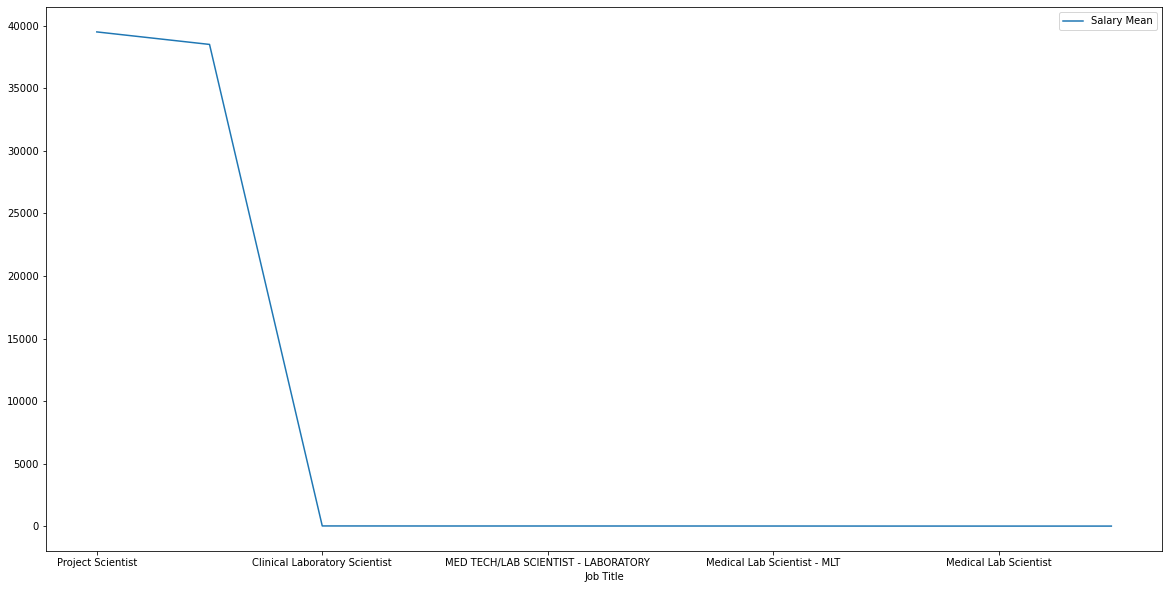

In [29]:
data1 = data[['Job Title','Salary Mean']].groupby(['Job Title']).mean().sort_values(ascending=False,by='Salary Mean').tail(10)
data1.plot(kind='line',figsize=(20,10))

#### Insights:
1. By Salary Mean, the best paid jobs titles are: Principal Data Scientist with over 10 years of experience, Staff Machine Learning Engineer, Sr Scientist II, Data Scientist Alpha Insights, Data Scientist - Sales.
2. There is a big difference between the salary of Data Scientist with over 10 years of experience and other jobs titles. Hence, as you gain experience, the salary increases.
3. We do not have an estimate of salaries for some positions related to health areas.
4. The worst paid job title in this dataset is Project Scientist with a salary mean of 40000 (USD)$

### II. How do salaries compare across the different industries?

In [30]:
data2 = data[['Industry','Salary Mean']].groupby(['Industry']).mean().sort_values(ascending=True,by='Salary Mean')

<AxesSubplot:title={'center':'Salaries across Industries'}, ylabel='Salary Mean'>

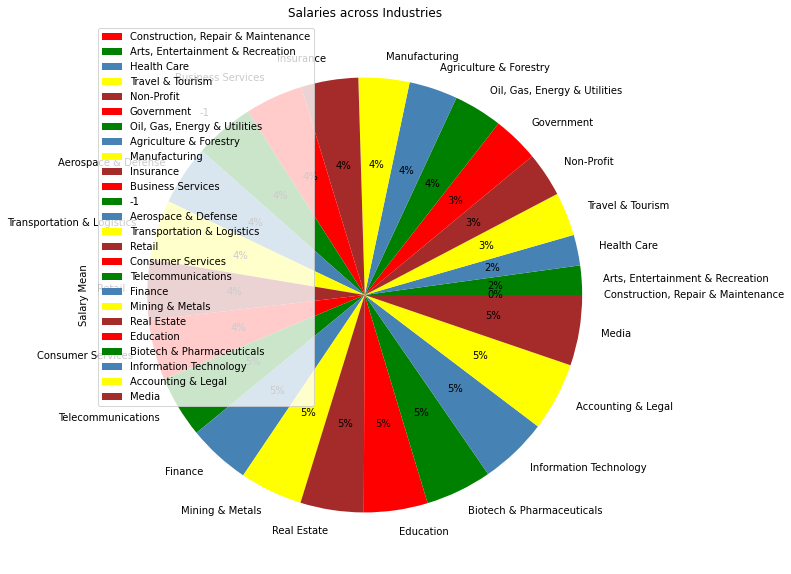

In [31]:
data2.plot(
    kind='pie', 
    y='Salary Mean', 
    autopct='%1.0f%%', 
    colors = ['red', 'green', 'steelblue','yellow', 'brown'],
    title='Salaries across Industries',
    figsize=(30, 10)
)

<AxesSubplot:xlabel='Industry'>

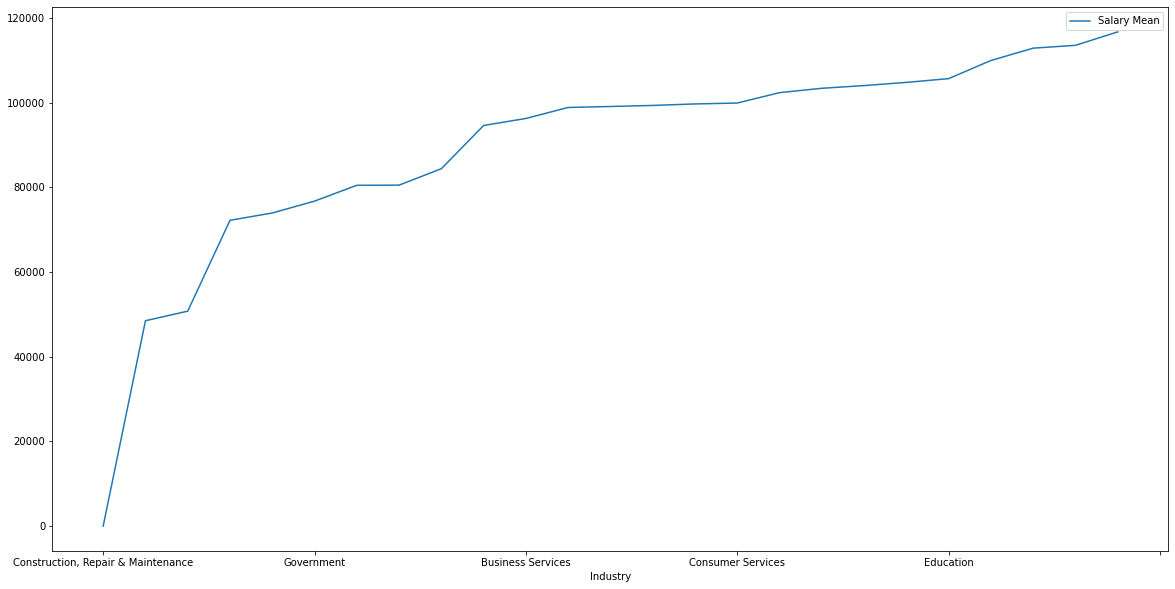

In [32]:
data2.plot(kind='line',figsize=(20,10))

In [33]:
data2.tail()

,Salary Mean
Industry,
Education,105638.888889
Biotech & Pharmaceuticals,109916.666667
Information Technology,112833.333333
Accounting & Legal,113500.000000
Media,116666.666667


#### Insights:
1. The best paid Industries are: Education, Biotech & Pharmaceuticals, Information Technology, Accounting & Legal and Media.
2. The Salary mean is similar in the Industries of Education, Real State, Mining & Metals, Finance & Telecommunications.
3. According to the dataset, the worst paid industries are: Construction, repair and maintenaince, Arts, enterteinment and recreation, Health Care, Travel and Tourism, Non-profit and Government.

### III. Is the location of the job/company relevant to the salary?

In [34]:
data3 = data[['Location','Salary Mean']].groupby(['Location']).mean().sort_values(ascending=False,by='Salary Mean')
data4 = data[['Headquarters','Salary Mean']].groupby(['Headquarters']).mean().sort_values(ascending=False,by='Salary Mean')

In [35]:
data3.head(15)

,Salary Mean
Location,
"Bellevue, WA",184500.000000
"Mountain View, CA",177187.500000
"Burbank, CA",164000.000000
"South San Francisco, CA",163000.000000
"Emeryville, CA",153000.000000
"Newark, NJ",146000.000000
"Fort Lee, NJ",145666.666667
"Jersey City, NJ",144750.000000
"Saint Louis, MO",143500.000000


In [36]:
data4.head(15)

,Salary Mean
Headquarters,
"Fremont, CA",225000.000000
"Burbank, CA",164000.000000
"South San Francisco, CA",163000.000000
"Mill Valley, CA",162000.000000
"Mountain View, CA",158818.181818
"San Jose, CA",156928.571429
"Santa Clara, CA",154500.000000
"Nashville, TN",153000.000000
"Foster City, CA",152833.333333


In [37]:
data3.tail(15)

,Salary Mean
Location,
"Logan, UT",47000.0
"Richfield, OH",45500.0
"West Palm Beach, FL",44000.0
"Cedar Rapids, IA",43000.0
"Kansas City, MO",40500.0
"Alabaster, AL",39500.0
"Longmont, CO",29500.0
"Omaha, NE",28512.5
"New Orleans, LA",24010.0


In [38]:
data4.tail(15)

,Salary Mean
Headquarters,
"Omaha, NE",47833.333333
"San Luis Obispo, CA",47500.000000
"Logan, UT",47000.000000
"Richfield, OH",45500.000000
"West Palm Beach, FL",44000.000000
"Cedar Rapids, IA",43000.000000
"Kansas City, MO",40500.000000
"Decatur, AL",39500.000000
"Tampa, FL",37500.000000


#### Insights:
1. When comparing the 15 locations with the best average salary and the 15 locations with the best average salary, it was discovered that: Mountain View, Burbank, South San Francisco, Newark, Fort Lee, San Jose, Marlborough and Foster City coincide in both statistics. Being a total of 8 of 15 matches.
2. When comparing the 15 locations with the worst average salary and the 15 locations with the worst average salary, it was discovered that: Logan, Richfield, West Palm Beach, Cedar Rapids, Kansas City, Port Washington, Vail, Lewes and Reading coincide in both statistics. Being a total of 9 of 15 matches.
3. Hence, in an empirical way, we can conclude that the Location of the job and the headquarter of the company have influence and is relevant to the salary.

### IV. How different are the salaries based on: The size of the company, its revenue, its age and its ownership type?

In [39]:
def age_company(value):
    current_year = date.today().year
    age = current_year-value
    return age

In [40]:
data['Age'] = data['Founded'].apply(age_company).astype(int)

In [41]:
data5 = data[['Size', 'Revenue', 'Age', 'Type of ownership','Salary Mean']].groupby(['Size', 'Revenue','Type of ownership']).mean().sort_values(ascending=False,by='Size')

In [42]:
data5.head(50)

Age  \
Size       Revenue                Type of ownership                             
51-200     50000000-100000000     Company - Private                 12.571429   
           100000000-500000000    Company - Private                 13.000000   
           0                      Company - Private                 12.964286   
                                  Company - Public                  14.000000   
           1000000-5000000        Company - Private                 11.571429   
           10000000-25000000      Company - Public                  14.000000   
                                  Nonprofit Organization            87.000000   
                                  Company - Private                 24.076923   
           100000000-500000000    Subsidiary or Business Segment    16.000000   
           1000000000-2000000000  Company - Private                 21.083333   
                                  Company - Public                  16.000000   
                                  Other Organization                22.000000   
           5000000-10000000       Company - Private                767.375000   
                                  Subsidiary or Business Segment    31.000000   
501-1000   2000000000-5000000000  Company - Private                 34.600000   
           0                      College / University             479.111111   
                                  Company - Private                170.962963   
                                  Company - Public                  34.500000   
                                  Nonprofit Organization            98.000000   
                                  Subsidiary or Business Segment    23.166667   
           100000000-500000000    Company - Private                306.500000   
                                  Company - Public                  68.000000   
                                  Hospital                          56.000000   
           1000000000-2000000000  Nonprofit Organization            43.000000   
           50000000-100000000     Company - Public                  16.000000   
                                  Nonprofit Organization           711.000000   
                                  Subsidiary or Business Segment    36.500000   
           500000000-1000000000   Company - Private                 37.250000   
                                  Company - Public                  49.000000   
                                  Nonprofit Organization            66.500000   
           5000000000-10000000000 Company - Public                 120.000000   
           50000000-100000000     Company - Private                 32.500000   
5001-10000 500000000-1000000000   Company - Public                 172.000000   
           2000000000-5000000000  Company - Public                 151.590909   
           0                      Nonprofit Organization             5.000000   
           10000000000            Company - Private                157.000000   
           2000000000-5000000000  Company - Private                 33.333333   
           5000000000-10000000000 Company - Public                 170.000000   
           2000000000-5000000000  Nonprofit Organization            65.777778   
           5000000000-10000000000 Company - Private                 39.000000   
                                  Nonprofit Organization            77.000000   
201-500    2000000000-5000000000  Company - Public                  22.000000   
           1000000000-2000000000  Nonprofit Organization            29.000000   
                                  Subsidiary or Business Segment    17.000000   
           100000000-500000000    Subsidiary or Business Segment  2023.000000   
           50000000-100000000     Company - Private                 32.583333   
                                  Company - Public                  31.000000   
           500000000-1000000000   Company - Private                 28.000000   
           1000000000-20

#### Insight: Companies/Organizations with 5,001-10,000 employees
1. Public companies with 5,001-10,000 employees that offer the highest average salary with 113,613 (USD) have an average age of 151.59 years. With a range of 2-5 billion (USD) in revenue.
2. The private companies with 5,001-10,000 employees that offer the highest average salary with 96,729.16 (USD) have an average age of 157 years. They register 10 billion (USD) of income.
3. The non-profit organizations with 5,001-10,000 employees that offer the highest median salary with 106,500 (USD) have an average age of 77 years. There is no income record.

#### Insight: Companies/Organizations with 501-1,000 employees
1. Public companies with 501-1000 employees that offer a higher average salary with 139,5000.00 (USD) have an average age of 16 years. Registering a range of 50 to 100 million (USD) of income.
2. The subsidiary companies with 501-1000 employees that offer the highest average salary with 144,583.33 (USD) have an average age of 23.16 years. They do not record income.
3. The private companies with 501-1000 employees that offer the highest average salary with 97,186.18 (USD) have an average age of 170.96 years. There is no income record.
4. The hospitals with 501-1000 employees that offer the highest average salary with 31.50 (USD) have an average age of 56 years. They register a range of 100 to 500 million (USD) of income.
5. The non-profit organizations with 501-1000 employees that offer the highest average salary with 80,062.50 (USD) have an average age of 66.50 years. They register a range of 500 million to 1 billion (USD) of income.
6. The colleges/universities with 501-1000 employees that offer the highest median salary with 119,000.00 (USD) have a median age of 479.11 years. No income recorded.

#### Insight: Companies/Organizations with 201-500 employees
1. The subsidiaries with 201-500 employees that offer the highest average salary with 103,000.00 (USD) have an average age of 17 years. They register a range of 25 to 50 million (USD) of income.
2. The public companies with 201-500 employees that offer the highest average salary with 98,000.00 (USD) have an average age of 1020 years. No income recorded.
3. The private companies with 201-500 employees that offer the highest average salary with 105,734.37 (USD) have an average age of 17.59 years. No income recorded.
4. The non-profit organizations with 201-500 employees that offer the highest average salary with 87,500 (USD) have an average age of 2023 years. No income recorded.

#### Insight: Companies/Organizations with 51-200 employees
1. The public companies with 51-200 employees that offer the highest average salary with 139,000 have an average age of 14 years. they register a range of 10 to 25 million (USD) of income.
2. Private companies with 51-200 employees that offer the highest average salary with 131,625.00 (USD) have an average age of 767.37 years. Register a range of 5 to 10 million (USD) of income.
3. The subsidiaries with 51-200 employees that offer the highest average salary with 144,250.00 (USD) have an average age of 31 years. Register a range of 5 to 10 million (USD) of income.

### VI. How does the rating of a company relate to the salary?

<AxesSubplot:xlabel='Rating,Company Name'>

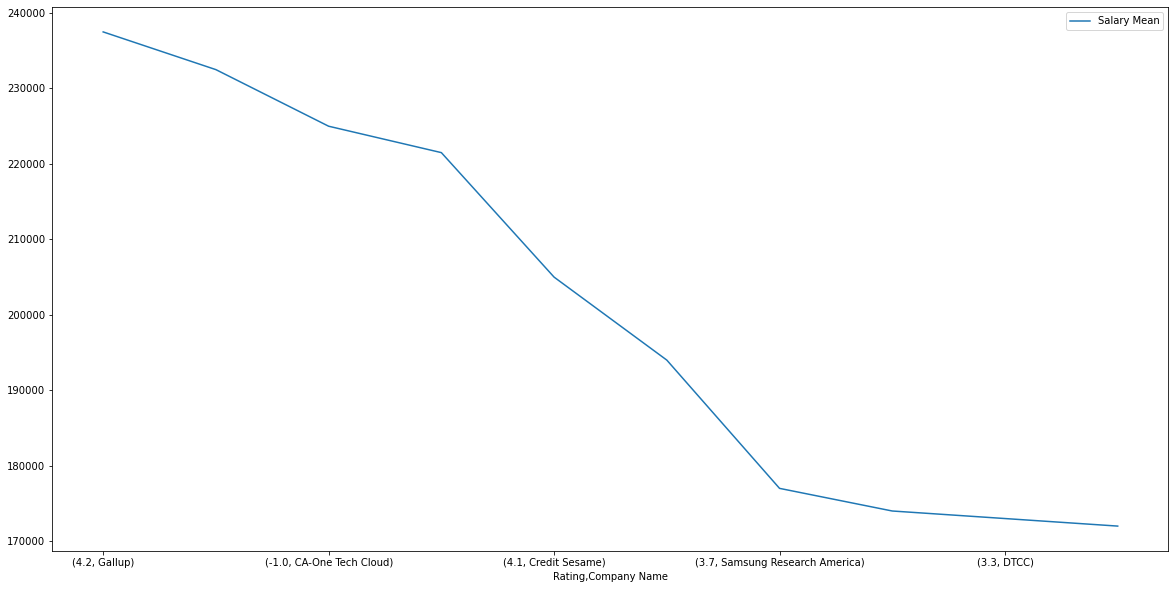

In [43]:
data6 = data[['Company Name','Rating','Salary Mean']].groupby(['Rating', 'Company Name']).mean().sort_values(ascending=False,by='Salary Mean').head(10)
data6.plot(kind='line',figsize=(20,10))

In [44]:
data6.head()

,,Salary Mean
Rating,Company Name,
4.2,Gallup,237500.0
4.7,Sage Intacct,232500.0
-1.0,CA-One Tech Cloud,225000.0
4.2,Grand Rounds,221500.0
4.1,Credit Sesame,205000.0


In [45]:
data6.tail()

,,Salary Mean
Rating,Company Name,
3.2,The Climate Corporation,194000.0
3.7,Samsung Research America,177000.0
3.5,Nektar Therapeutics,174000.0
3.3,DTCC,173000.0
4.4,Two Sigma,172000.0


#### Insight:
1. As we can see, the company Gallup with a 4.2 rating offers the higher salary mean with 237,500 (USD) And the company Two Sigma with a 4.4 rating offers the lower salary mean with 172,000 (USD). Hence, the rating company is not a main factor that has influence in the salary of the employee.

### V. Which are the most common tools required for a data job? which are the best paid?

In [46]:
data['Job Description'] = data['Job Description'].apply(nltk.word_tokenize)

In [47]:
def get_tools(list_words):
    list_tools = ['python', 'power bi', 'matlab', 'microsoft word', 'powerpoint'
                 , 'excel', 'ms access', 'lms', 'sas', 'data visualization tools'
                 , 'sql', 'postgresql', 'mysql', 'r', 'mongodb', 'git', 'azure'
                 , 'aws', 'scala', 'clojure', 'java', 'c++', 'spark', 'tableau'
                 , 'dataiku', 'outlock', 'spotfire', 'jreview', 'rdkit', 'r-shiny'
                 , 'redis', 'ruby', 'github', 'nextflow', 'kubernetes', 'rails'
                 , 'vue.js', 'snakemake', 'docker', 'ssis', 'bids', 'looker'
                 , 'mixpanel', 'c#', '.net', 'xml', 'ms-sql', 'hive', 'business intelligence'
                 , 'html', 'javascript', 'html5', 'tensorflow', 'cuda', 'flink']
    list_result = []
    
    for element in list_words:
        if element in list_tools:
            list_result.append(element)
    return list_result
        

In [48]:
data['Job Tools'] = data['Job Description'].apply(get_tools)

In [50]:
data.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Revenue,Salary Mean,Age,Job Tools
0,Data Scientist,53000-91000,"[data, scientist, location, :, albuquerque, ,,...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501-1000,1973,Company - Private,Aerospace & Defense,50000000-100000000,72000.0,49,"[tableau, python, matlab, powerpoint, excel, l..."
1,Healthcare Data Scientist,63000-112000,"[what, you, will, do, :, i., general, summary,...",3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care,2000000000-5000000000,87500.0,38,"[python, python, java]"
2,Data Scientist,80000-90000,"[knowbe4, ,, inc., is, a, high, growth, inform...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501-1000,2010,Company - Private,Business Services,100000000-500000000,85000.0,12,"[sql, excel, sas, python, r, hive, spark]"
3,Data Scientist,56000-97000,"[*, organization, and, job, id, *, *, job, id,...",3.8,PNNL,"Richland, WA","Richland, WA",1001-5000,1965,Government,"Oil, Gas, Energy & Utilities",500000000-1000000000,76500.0,57,[]
4,Data Scientist,86000-143000,"[data, scientist, affinity, solutions, /, mark...",2.9,Affinity Solutions,"New York, NY","New York, NY",51-200,1998,Company - Private,Business Services,0,114500.0,24,"[python, sas, r, postgresql, mysql, sql]"


In [63]:
joined_lists = result = sum(data['Job Tools'].values.tolist(), [])

In [103]:
data7 = pd.DataFrame(joined_lists)
data7.columns = ['Job Tool']
pivot_array = np.ones((len(joined_lists),1))
print(pivot_array.shape)
data7['count'] = pd.DataFrame(pivot_array)

(2958, 1)


In [106]:
data7 = data7[['Job Tool','count']].groupby(['Job Tool']).sum().sort_values(ascending=False,by='count')

In [108]:
data7.head(5)

,count
Job Tool,
sql,468.0
python,448.0
r,286.0
spark,181.0
tableau,176.0


In [113]:
data8 = data[['Job Title', 'Salary Mean', 'Job Tools']].groupby(['Job Title']).mean().sort_values(ascending=False,by='Salary Mean')

In [110]:
data8.head(20)

,Job Title,Salary Mean,Job Tools
99,Senior Data Scientist,237500.0,"[excel, python, python, r]"
382,Principal Machine Learning Scientist,232500.0,"[python, sql, sql, sql]"
167,Principal Data Scientist with over 10 years ex...,225000.0,"[python, aws, matlab, r, tableau]"
246,Principal Data Scientist with over 10 years ex...,225000.0,"[python, aws, matlab, r, tableau]"
536,Data Science Manager,221500.0,"[sql, python, r, azure]"
300,Lead Data Engineer,205000.0,"[aws, java, python, sql, spark]"
181,Lead Data Engineer,205000.0,"[aws, java, python, sql, spark]"
424,Lead Data Engineer,205000.0,"[aws, java, python, sql, spark]"
592,Principal Data Scientist,194000.0,[]
451,Principal Data Scientist,194000.0,[]


#### Insights:
1. The most used tools in data science are: sql, python, r, spark and tableau.
2. The best paid tools in data science are: python, sql and r